In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import io
from IPython import display
import time

In [2]:
data = io.loadmat('ex7data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data['X']
X.shape

(300, 2)

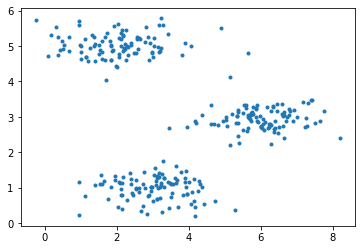

In [4]:
plt.scatter(X[:,0],X[:,1], marker='.')
plt.show()

In [5]:
class K_means():
    def __init__(self, X, K):
        self.X = X
        self.K = K
        self.centroids = self.initCentroids(X, K)
        self.idx = np.zeros(X.shape[0])

    def initCentroids(self, X, K):
        m,n = X.shape
        randidx = np.random.permutation(m)
        return X[randidx[:K], :]

    def start(self, iter):
        for i in range(iter):
            self.idx = self.findClosestCentroid(self.X, self.centroids, self.idx, self.K)
            self.centroids = self.computeMean(self.X, self.centroids, self.idx, self.K)
            print(i)
            self.plotData()
    
    def findClosestCentroid(self, X, centroids, idx, K):
        m = idx.shape[0]
        distance = np.zeros(K)
        for i in range(m):
            for j in range(K):
                distance[j] = np.linalg.norm(X[i,:]-centroids[j,:])
            idx[i] = np.argmin(distance)
        return idx

    def computeMean(self, X, centroids, idx, K):
        for i in range(K):
            centroids[i,:] = np.mean(X[idx==i,:], axis=0)
        return centroids 

    def plotData(self):
        display.clear_output(wait=True)
        plt.scatter(self.X[self.idx==0, 0], self.X[self.idx==0, 1], c='r', marker='.')
        plt.scatter(self.X[self.idx==1, 0], self.X[self.idx==1, 1], c='b', marker='.')
        plt.scatter(self.X[self.idx==2, 0], self.X[self.idx==2, 1], c='g', marker='.')

        plt.scatter(self.centroids[:,0], self.centroids[:,1], c='k', marker='x')
        plt.show() 
        time.sleep(1)
            

In [6]:
model = K_means(X, 3)

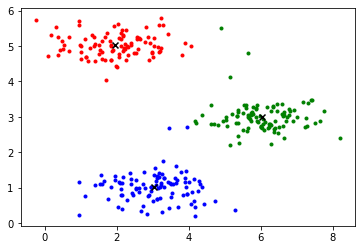

In [7]:
model.start(10)